<a href="https://colab.research.google.com/github/MKryo/assignment_noisecanceling/blob/master/%E6%83%85%E3%82%B7%E3%82%B9_%E7%B7%8F%E6%BC%94_%E8%AA%B2%E9%A1%8C3_%E3%83%AD%E3%83%BC%E3%83%91%E3%82%B9%E3%83%95%E3%82%A3%E3%83%AB%E3%82%BF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

課題名：アクティブノイズキャンセリング（ANC）

提出日：７月24日(金)

In [ ]:
#open files form Google Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
#音声ファイル読み込みのためのライブラリをインストール
!pip install soundfile

In [ ]:
#基本的なライブラリのインポート

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import zipfile
import librosa
import soundfile as sf
import PIL
import IPython
import io
import os


#音声データを保存しているzipファイルのある場所
path = 'My Drive/'

In [ ]:
#課題１で用いた音声を読み込む
#zipファイルから保存してあるファイルのリストを取得して，実際のデータを読み込む
zip_file = 'wav.zip'
with zipfile.ZipFile(path+zip_file, 'r') as zip_data:
  zip_lst = zip_data.namelist()# ファイルリスト取得
  fn = zip_lst[1]
  tmp = io.BytesIO(zip_data.read(fn))
  y, sr = sf.read(tmp)#y:音声データ，sr:サンプリング周波数

160000
16000


sampling rate: 16000


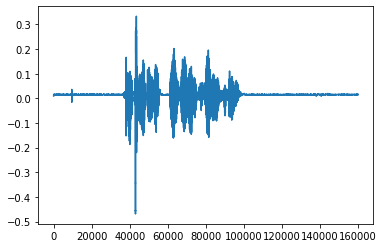

In [ ]:
#音声1を区間の先頭から10秒間表示する 
print('sampling rate:', sr)
plt.plot(y[0:10*sr])

In [ ]:
#読み込んだデータを再生してみる
import IPython

IPython.display.Audio(data=y, rate=sr)

In [ ]:
noise = np.random.random(sr)

In [ ]:
#ローパスフィルターのサンプル関数
M = 4
def low_filter(M, signal):
  lf = np.linspace(0,M,M)
  lf = np.power(0.9,lf)
  #lf = np.array([0.9, 0.09, 0.009, 0.009])
  nl = np.convolve(signal, lf, mode='same')

  nl = (nl/max(nl))*max(signal)
  return nl

In [ ]:
#雑音をlow_filterに通す
nl = low_filter(M, noise)
nl2 = low_filter(M, nl)

In [ ]:
#音声１にnl2を3〜4秒の区間に加えて音声２を作る
y2 = y.copy()
y2[3*sr : 4*sr] += nl2
n_voice = y2.copy()
n2_voice = y2.copy()
n3_voice = y2.copy()

In [ ]:
#ノイズ(nl2)を加えた音声2を流す
import IPython

IPython.display.Audio(data=n_voice, rate=sr)

In [ ]:
n_voice[3*sr : 4*sr] -= noise

In [ ]:
IPython.display.Audio(data=n_voice, rate=sr)

In [ ]:
n2_voice[3*sr : 4*sr] -= nl

In [ ]:
IPython.display.Audio(data=n2_voice, rate=sr)

In [ ]:
n3_voice[3*sr : 4*sr] -= nl2

In [ ]:
IPython.display.Audio(data=n3_voice, rate=sr)

In [ ]:
from sklearn.metrics import mean_squared_error

def rmse(y_true: np.ndarray, y_pred: np.ndarray) -> np.float64:
    return np.sqrt(mean_squared_error(y_true, y_pred))


**RMSEを用いて音質を調べる**


この値が小さい方が音質が良い指標となります。

In [ ]:
rmse(y,n_voice)

0.08139901519518464

In [ ]:
rmse(y,n2_voice)

0.02292324782345884

In [ ]:
rmse(y,n3_voice)

2.9027475788800784e-18